# POSTTEST 5

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Snapchat_app_store_reviews.csv")

## Supervised Learning

### Support Vector Classifier (SVM)

In [3]:
df.rename(columns={'Unnamed: 0': 'Number'}, inplace=True)

In [4]:
df['Number'] = df['Number'].astype('float64')
df['rating'] = df['rating'].astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    9560 non-null   float64
 1   userName  9560 non-null   object 
 2   rating    9560 non-null   float64
 3   review    9560 non-null   object 
 4   isEdited  9560 non-null   bool   
 5   date      9560 non-null   object 
 6   title     9560 non-null   object 
dtypes: bool(1), float64(2), object(4)
memory usage: 457.6+ KB


### Linear Regression

Memisahkan fitur dan target dari dataset

In [6]:
X, y = df[['rating']], df['Number']

Membagi data fitur dan target menjadi data training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

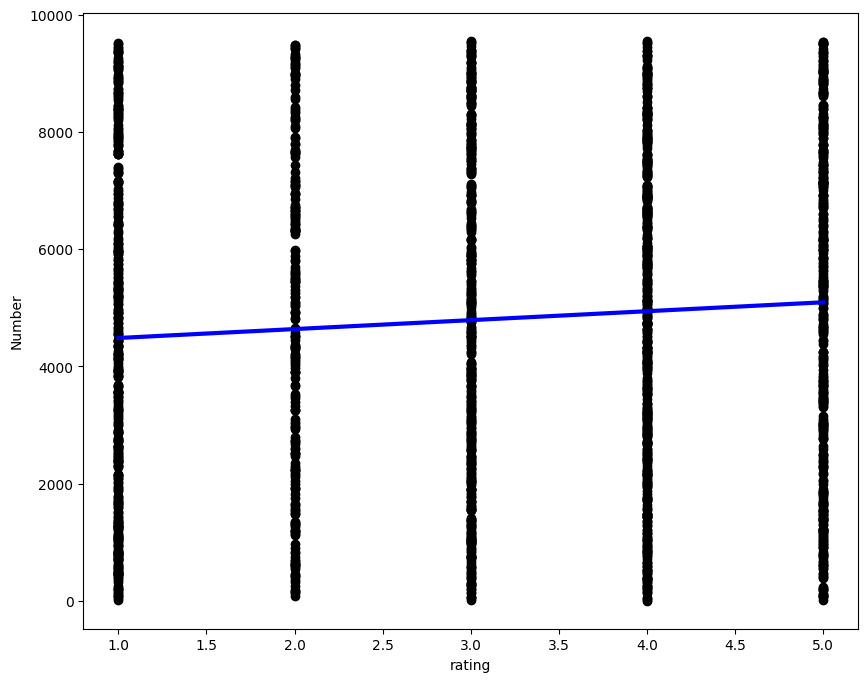

In [9]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("rating")
plt.ylabel("Number")
plt.show()

Membuat objek classifier SVM

In [10]:
svm = SVC(kernel="linear")

In [11]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

melakukan prediksi data test dengan model dan menampilkan hasil

In [12]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 2408.249451737501
MSE : 7712136.266085188
RMSE : 2777.0733274591776
R-Squared : 0.0004000169489883909


## Unsupervised Learning

### K-Means

Menggunakan fitur X dan menentukan banyaknya kelompok

In [13]:
X = df[["rating", "Number"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [14]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [15]:
KMeans(n_clusters=2, n_init=10)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [16]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

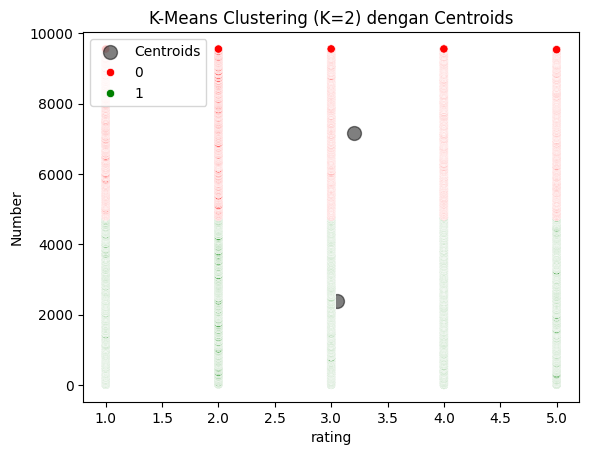

In [17]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="rating", y="Number", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("rating")
plt.ylabel("Number")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [19]:
cross_tab = pd.crosstab(df["cluster"], df["rating"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
rating    1.0  2.0   3.0   4.0   5.0
cluster                             
0         846  613  1083  1191  1040
1        1033  619  1088  1155   892 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [22]:
ari = adjusted_rand_score(df["rating"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [24]:
true_labels_num = df["Number"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.14


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [26]:
homogeneity = homogeneity_score(df["Number"], cluster_labels)
completeness = completeness_score(df["Number"], cluster_labels)
v_measure = v_measure_score(df["Number"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.08
Completeness Score: 1.00
V-Measure Score: 0.14
